# Weights clustering

## Init

In [1]:
from pathlib import Path
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib as mpl
from tqdm.auto import tqdm

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Load data

In [3]:
save_path = Path("..") / "save"
save_path.exists()

True

In [4]:
# data_dir = save_path / "2025-03-08_01-44-12_EastWest_save-all-agents"
data_dir = save_path / "2025-03-08_01-47-50_LeftRight_save-all-agents"
data_dir.exists()

True

In [5]:
data_path = data_dir / "data.tar"
data_path.exists()

True

In [6]:
data_dict = torch.load(data_path, weights_only=False, map_location=DEVICE)
# p = data_dict["p"]
# env = data_dict["env"]
# net = data_dict["net"]

In [7]:
weights = data_dict["weights"]["val"]

In [12]:
weights[0].shape

torch.Size([512, 19])

## Clustering

In [9]:
n_components = 2
perplexity = 30
max_iter = 5000

In [10]:
tsne = TSNE(
        n_components=n_components,
        init="pca",
        random_state=0,
        perplexity=perplexity,
        max_iter=max_iter,
    )

  0%|          | 0/4 [00:00<?, ?it/s]

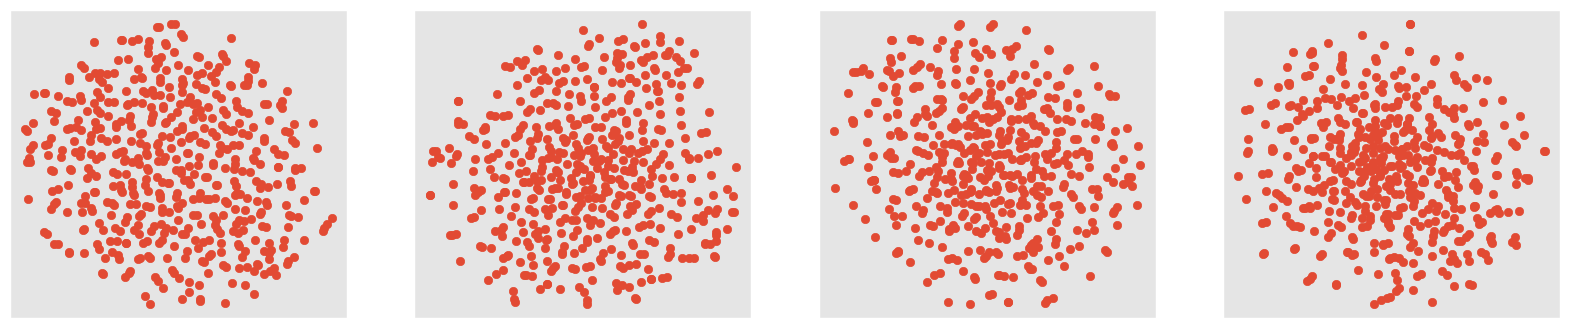

In [11]:
with mpl.style.context("ggplot"):
    fig, ax = plt.subplots(1, len(weights) - 1, figsize=(20, 4))

    for w_i, w_val in enumerate(tqdm(weights[:-1])):
        X = w_val.detach().numpy()
        Y = tsne.fit_transform(X)
        
        ax[w_i].scatter(Y[:, 0], Y[:, 1])
        ax[w_i].xaxis.set_major_formatter(NullFormatter())
        ax[w_i].yaxis.set_major_formatter(NullFormatter())
        ax[w_i].set_xticks([])
        ax[w_i].set_yticks([])
        ax[w_i].axis("tight")
    plt.show()